## Validate Data Completeness for Critical Fields

**Description**: In `transaction_data.csv` , calculate the missing percentage of critical fields: "transaction_id", "amount", and "date", and visualize them.

In [3]:
# Write your code from here

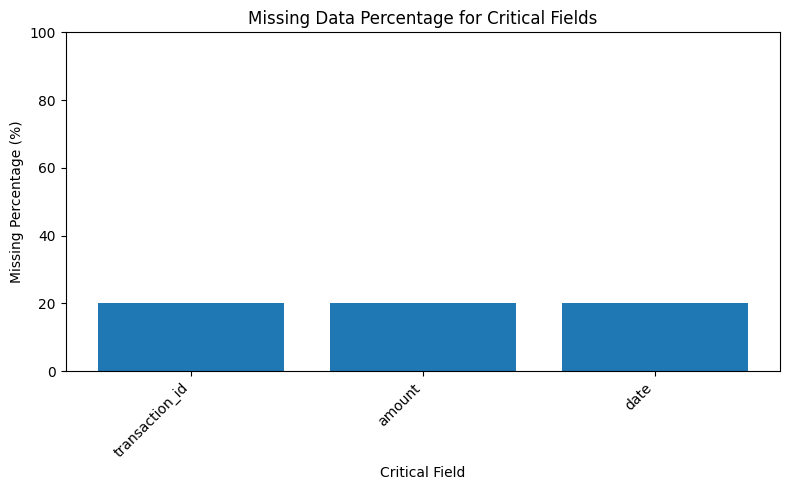

Missing Data Percentage for Critical Fields:
- transaction_id: 20.00%
- amount: 20.00%
- date: 20.00%


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

def validate_completeness_critical_fields(file_path, critical_fields):
    """
    Calculates and visualizes the missing percentage of critical fields in a CSV file.

    Args:
        file_path (str): Path to the CSV file containing transaction data.
        critical_fields (list): A list of strings representing the names of the
                               critical fields to validate.
    """
    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError as e:
        print(f"Error: File not found: {e}")
        return

    # Check if all critical fields exist in the DataFrame
    missing_columns = [field for field in critical_fields if field not in df.columns]
    if missing_columns:
        print(f"Error: Critical fields {missing_columns} not found in the CSV.")
        return

    # Calculate missing percentages for critical fields
    missing_percentages = {}
    for field in critical_fields:
        missing_count = df[field].isnull().sum()
        total_count = len(df)
        missing_percentages[field] = (missing_count / total_count) * 100

    # Visualize missing percentages
    plt.figure(figsize=(8, 5))
    plt.bar(missing_percentages.keys(), missing_percentages.values())
    plt.title('Missing Data Percentage for Critical Fields')
    plt.xlabel('Critical Field')
    plt.ylabel('Missing Percentage (%)')
    plt.ylim(0, 100)  # Set y-axis limit to 0-100% for percentage
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.tight_layout()
    plt.show()
    print("Missing Data Percentage for Critical Fields:")
    for field, percentage in missing_percentages.items():
        print(f"- {field}: {percentage:.2f}%")

transaction_data = {'transaction_id': [1, None, 3, 4, 5, 6, 7, None, 9, 10],
                      'amount': [100.0, 50.0, None, 80.0, 120.0, 70.0, 90.0, None, 150.0, 110.0],
                      'date': ['2023-01-01', '2023-01-02', '2023-01-03', None, '2023-01-05',
                               '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09', None],
                      'customer_id': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110]}
transaction_df = pd.DataFrame(transaction_data)
transaction_df.to_csv('transaction_data.csv', index=False)
critical_fields_to_check = ["transaction_id", "amount", "date"]
validate_completeness_critical_fields('transaction_data.csv', critical_fields_to_check)